# __Gaussian Integral__

We want to evaluate
\begin{align*}
I(\sigma)=\int_0^\infty x^3\exp(-\frac{x^2}{2\sigma^2})dx=2\sigma^4
\end{align*}
using Montecarlo integration.

---

If we want to compute $I=\int f(x)p(x)dx$, where $\int p(x)dx=1$, then:
\begin{align*}
I=\int f(x)p(x)dx=\frac{1}{N}\sum_{i=1}^N f(x_i)
\end{align*}
where $x_i$ are sample drawn from $p$.
The precision gets better as $N$ increases.

In our case the integrand can be written as:
\begin{align*}
x^3\times\mathcal{N}(x,0,\sigma)\times\sigma\sqrt{2\pi}
\end{align*}
where $x^3=f(x)$ and $\mathcal{N}(x,0,\sigma)$ is the normal distribution: $\mathcal{N}(x,\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$, which satisfies $\int_{-\infty}^{+\infty}\mathcal{N}(x,\mu,\sigma)dx=1$.

Since we want to integrate from $0$ to $\infty$, we have to take into account that $\int_0^\infty\mathcal{N}(x,0,\sigma)dx=\frac{1}{2}$.
Therefore the __PDF__ $p(x)$ we shall use is a __normal distribution__ renormalized such that $\int_0^\infty p(x)dx=1$. The answer is:
\begin{align*}
p(x)=2\times\mathcal{N}(x,0,\sigma)
\end{align*}

---
We have:
\begin{align*}
f(x)p(x)=x^3\times 2\times\mathcal{N}(x,0,\sigma)=x^3\times 2\times\frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{x^2}{2\sigma^2})
\end{align*}.
Hence:
\begin{align*}
I(\sigma, N)=\int_0^\infty x^3\exp(-\frac{x^2}{2\sigma^2})dx=\frac{\sigma\sqrt{2\pi}}{2}\int_0^\infty f(x)p(x)dx=\frac{\sigma\sqrt{2\pi}}{2}\frac{1}{N}\sum_{i=1}^N f(x_i)
\end{align*}
where $x_i$ are drawn from $\mathcal{N}(x,0,\sigma)$ from the interval $[0,+\infty)$.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

#----------------------------------------------------
# This is a function to raise the elements of a list to a given power
def turn_to_power(list, power): 
    return [number ** power for number in list]

# Returns the analytical value of the integral as a function of sigma
def expected_result(sigma):
    return 2 * sigma ** 4

# Returns the value of the integral computed via Montecarlo integration
# N is the number of samples to be taken for the computation
def compute_integral(sigma, N):
    index = 0 # Support variable for the following loop
    sample = [] # List to store the sampled values

    # Sample values from a gaussian distribution
    # If the value is greater than zero, store it
    # Repeat until you have N values
    while (index < N):
        xi = np.random.normal(0, sigma)
        if xi > 0:
            sample.append(xi)
            index += 1
    
    return sigma * (2 * np.pi) ** (1 / 2) / 2 * np.mean(turn_to_power(sample, 3))

# Computes the value of the integral NI times and returns the results in a list
def compute_integral_N(sigma, N, NI):
    return [compute_integral(sigma, N) for i in range(NI)] # [int_0, int_1, int_2, ..., int_(NI-1)]

# Computes the value of the integral NI times for NT times
# and returns the t-value of the mean for each set of NI calculated values
def compute_t_integral(sigma, N, NI, NT):
    t = []
    true_mean = expected_result(sigma)
    for i in range(NT):
        integrals = compute_integral_N(sigma, N, NI)
        mean = np.mean(integrals)
        std = np.std(integrals)
        t.append((mean - true_mean) / std)
    
    return t # [t_0, t_1, t_2, ..., t_(NT-1)]

I = 85.47536744216968 +/- 0.19728773347941747
True I = 84.97698107622112
t = 0.19728773347941747
Fitted Mean = 85.47536744216968
Fitted STD = 6.238785922072151


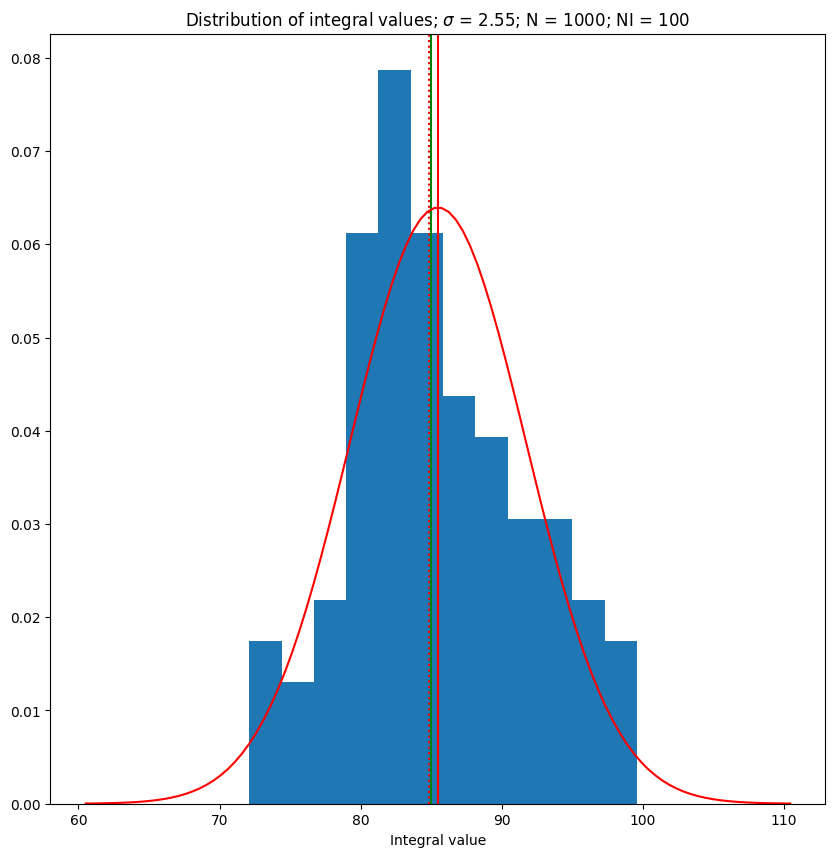

In [10]:
# Variables to hold the parameters of the problem
sigma = 2.5531
N = 1000 # Number of samplings to compute an integral
NI = 100 # Number of times the integral has to be computed

integral = compute_integral_N(sigma, N, NI) # [int_0, int_1, int_2, ..., int_(NI-1)]
true_integral = expected_result(sigma)

integral_mean = np.mean(integral)
integral_std = np.std(integral)
integral_mean_error = integral_std / (N ** (1 / 2))
integral_mean_t = (integral_mean - true_integral) / integral_mean_error
print("I = " + str(integral_mean) + " +/- " + str(integral_mean_error))
print("True I = " + str(true_integral))
print("t = " + str(integral_mean_error))

#----------------------------------------------------------------
# Plot of the distribution of the result of the integral
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(integral, 12, density=True)
ax.set_title("Distribution of integral values; $\sigma$ = " + str(
    round(sigma, 2)) + "; N = " + str(N) + "; NI = " + str(NI))
ax.set_xlabel("Integral value")
ax.axvline(integral_mean, c='red')
ax.axvline(np.median(integral), c='red', ls='dotted')
ax.axvline(true_integral, c='green')

# Gaussian fit
(loc, scale) = norm.fit(integral, loc=integral_mean, scale=integral_std)
x = np.linspace(loc - 4 * scale, loc + 4 * scale, 100)
p_x = norm.pdf(x, loc, scale)
ax.plot(x, p_x, 'r')

print("Fitted Mean = " + str(loc))
print("Fitted STD = " + str(scale))

In [11]:
# Let's look at the distribution of the t-value of the mean of the integral
NT = 100 # Number of times to compute the mean value of a set of values of the integral
t = compute_t_integral(sigma, N, NI, NT)

Text(0.5, 0, 't-value')

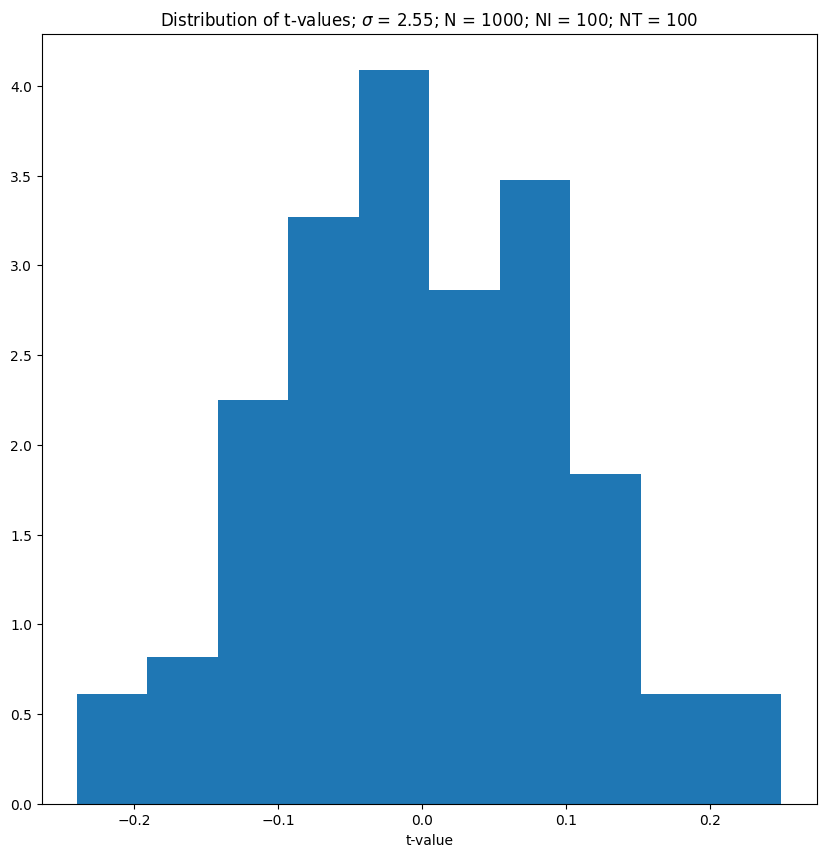

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(t, 10, density=True)
ax.set_title("Distribution of t-values; $\sigma$ = " + str(
    round(sigma, 2)) + "; N = " + str(N) + "; NI = " + str(NI) + "; NT = " + str(NT))
ax.set_xlabel("t-value")